### load image and attach mask based on landmark

In [1]:
import os, cv2, dlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import random

In [4]:
img = cv2.imread('imgs/02.jpg')
pt1 = np.array([[110,110],[270,110],[300,330],[170,350],[100,250],[50,150]], np.int32)
img = cv2.fillConvexPoly(img,pt1,(255,255,255))

cv2.imshow('fillConv',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
def convertMask(imgPath, landmarks, savePath = None):
    img = cv2.imread(imgPath)
    points = []
    for i in range(len(landmarks)):
        points.append([landmarks[i][1],landmarks[i][0]])
        
    points = np.array(points)
    img_white = cv2.fillConvexPoly(img,points,(255,255,255)).copy()
    img_black = cv2.fillConvexPoly(img,points,(3,3,3)).copy()
    
    cv2.imwrite(imgPath[:-4]+'_white.jpg',img_white)

In [21]:
f = open("./data/list_landmarks_celeba.txt", 'r')

landmarkList = []

while True:
    line = f.readline()
    if not line: break
    line.split()
    landmarkList.append()
    
f.close()

In [29]:
for i in range(10):
    print(landmarkList[i])

['202599']
['lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y', 'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x', 'rightmouth_y']
['000001.jpg', '165', '184', '244', '176', '196', '249', '194', '271', '266', '260']
['000002.jpg', '140', '204', '220', '204', '168', '254', '146', '289', '226', '289']
['000003.jpg', '244', '104', '264', '105', '263', '121', '235', '134', '251', '140']
['000004.jpg', '796', '539', '984', '539', '930', '687', '762', '756', '915', '756']
['000005.jpg', '273', '169', '328', '161', '298', '172', '283', '208', '323', '207']
['000006.jpg', '202', '158', '259', '165', '234', '196', '197', '228', '243', '233']
['000007.jpg', '129', '198', '204', '190', '163', '242', '140', '277', '202', '271']
['000008.jpg', '279', '198', '343', '205', '298', '251', '275', '282', '334', '284']


In [64]:
f = open("./data/list_bbox_celeba.txt", 'r')

boxList = []

while True:
    line = f.readline()
    if not line: break
    boxList.append(line.split()[0])
    
f.close()

In [65]:
boxList[:10]

['202599',
 'image_id',
 '000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg']

In [2]:
img_path = 'img_celeba'

In [3]:
imgPath = os.path.join(img_path, '000001.jpg')
# convertMask(imgPath, landmarks, savePath = None)

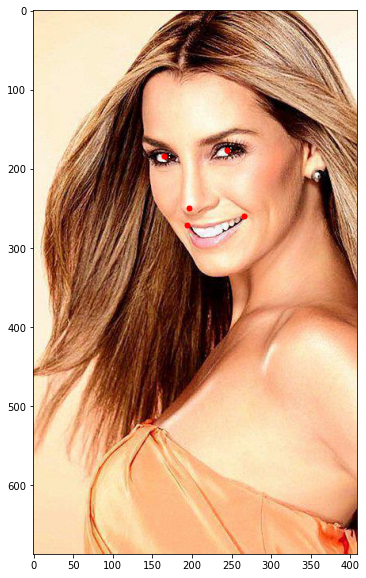

In [5]:
img = cv2.imread(imgPath)
plt.figure(figsize=(16, 10))
plt.scatter([165,244,196,194,266], [184,176,249,271,260], s=100, marker='.', c='r')
# plt.fill_between(marks[0], marks[1],marks[0][::-1],color='m',alpha=.5)
plt.imshow(img[:, :, ::-1])

In [6]:
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

In [7]:
img = cv2.imread(imgPath)
faces = detector(img)
face = faces[0]

In [8]:
# get landmarks
dlib_shape = predictor(img,face) 
shape2d = np.array([[p.x, p.y] for p in dlib_shape.parts()])

In [9]:
j, i =0,29

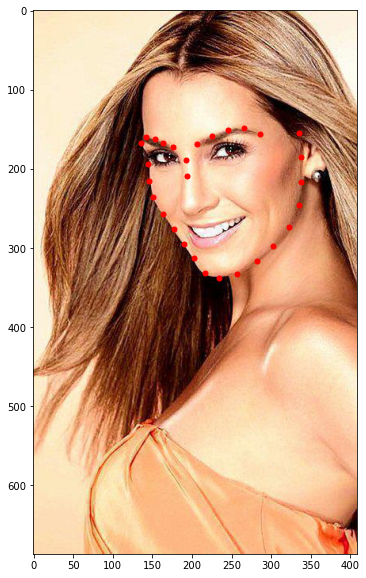

In [10]:
plt.figure(figsize=(16, 10))
plt.scatter([x[0] for x in shape2d][j:i] , [x[1] for x in shape2d][j:i] , s=100, marker='.', c='r')
# plt.fill_between(marks[0], marks[1],marks[0][::-1],color='m',alpha=.5)
plt.imshow(img[:, :, ::-1])

In [46]:
shape = np.concatenate((shape2d[2:15] ,[shape2d[28]]))

In [48]:
img = cv2.imread(imgPath)
img = cv2.fillConvexPoly(img,shape,(200,200,200))

cv2.imshow('fillConv',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [81]:
convertMask(imgPath, shape2d[2:15]+shape2d[28] )

## MAKE MASK DATA

In [69]:
def convertMask(imgPath, imgID, landmarks = None, savePath = None):
    COLORS = [(250,250,250),(200,200,200),(180,180,180),(50,50,50),(10,10,10)]

    img = cv2.imread(os.path.join(imgPath,imgID))
    
    faces = detector(img)
    if len(faces) == 0:
        return
    face = faces[0]
    dlib_shape = predictor(img,face) 
    landmarks = np.array([[p.x, p.y] for p in dlib_shape.parts()])
    
    maskLandmarks = np.concatenate((landmarks[2:15] ,[landmarks[28]]))
    points = []
    for i in range(len(maskLandmarks)):
        points.append([maskLandmarks[i][0],maskLandmarks[i][1]])
        
    points = np.array(points)
    img_mask = cv2.fillConvexPoly(img,points,random.choice(COLORS)).copy()
    
    cv2.imwrite(os.path.join(savePath,imgID[:-4]+'_mask.jpg'),img_mask)

In [55]:
random.choice(COLORS)

(50, 50, 50)

In [63]:
convertMask('img_celeba','000030.jpg',savePath = 'data/mask')

In [66]:
photoIDList = boxList[2:]

In [70]:
for imgID in photoIDList:
    convertMask('img_celeba', imgID, savePath = 'data/mask')

## MAKE NO FACIAL DATA

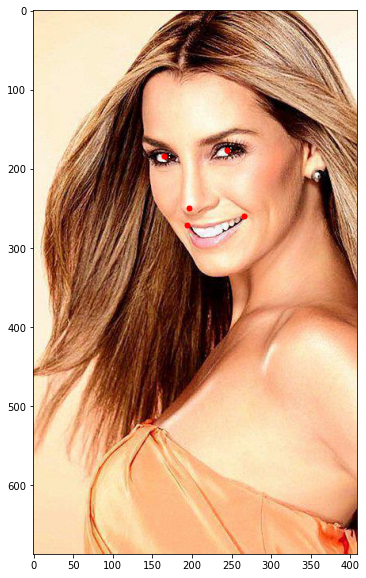

In [4]:
img = cv2.imread(imgPath)
plt.figure(figsize=(16, 10))
plt.scatter([165,244,196,194,266], [184,176,249,271,260], s=100, marker='.', c='r')
# plt.fill_between(marks[0], marks[1],marks[0][::-1],color='m',alpha=.5)
plt.imshow(img[:, :, ::-1])

In [19]:
f = open("./data/list_bbox_celeba.txt", 'r')

boxList = []

i =0

while True:
    i+=1
    line = f.readline()
    if not line: break
    info = line.split()
    if len(info)>4 and i>3:
        imgID = info[0]
        x, y, w, h = int(info[1]), int(info[2]), int(info[3]), int(info[4])
        boxList.append([imgID, x, y, w, h])

f.close()

In [18]:
len(info)

5

In [46]:
boxList[:3]

[['000002.jpg', 72, 94, 221, 306],
 ['000003.jpg', 216, 59, 91, 126],
 ['000004.jpg', 622, 257, 564, 781]]

In [ ]:
img_white = cv2.fillConvexPoly(img,points,(255,255,255)).copy()

In [36]:
def salt_pepper(img, padding, p,x,y,w,h):
    output = img 
    thres = 1 - p
    
    for j in range(x-padding,x+w+padding):
        for i in range(y-padding,y+h+padding):
            rdn = random.random()
            if rdn < p:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = img[i][j]
    
    return output

In [26]:
pts = np.array([[95,71],[95+226,71],[95+226,71+313],[95,71+313]])

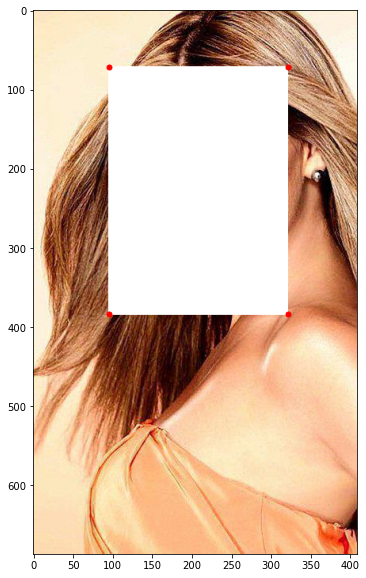

In [27]:
img = cv2.imread(imgPath)
img_n = cv2.fillConvexPoly(img, pts ,(255,255,255)).copy()
plt.figure(figsize=(16, 10))
plt.scatter([95,95+226, 95, 95+226], [71,71+313,71+313,71], s=100, marker='.', c='r')
# plt.fill_between(marks[0], marks[1],marks[0][::-1],color='m',alpha=.5)
plt.imshow(img_n[:, :, ::-1])

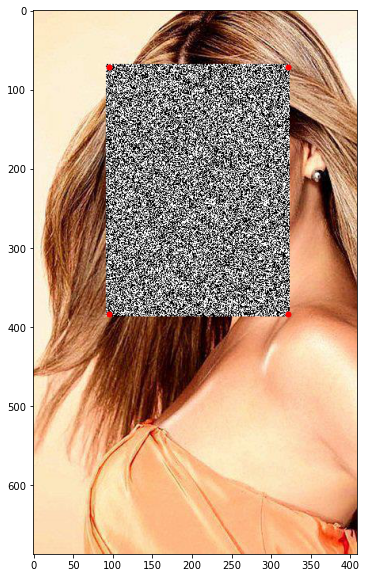

In [41]:
img = cv2.imread(imgPath)
img_n = salt_pepper(img, 3, 0.5,95,71,226,313)
plt.figure(figsize=(16, 10))
plt.scatter([95,95+226, 95, 95+226], [71,71+313,71+313,71], s=100, marker='.', c='r')
# plt.fill_between(marks[0], marks[1],marks[0][::-1],color='m',alpha=.5)
plt.imshow(img_n[:, :, ::-1])

In [48]:
def convertNoFace(imgPath, imgID, savePath, x,y,w,h):
    img = cv2.imread(os.path.join(imgPath,imgID))
    img_n = salt_pepper(img, 0, 0.5,x,y,w,h)
    
    cv2.imwrite(os.path.join(savePath,imgID[:-4]+'_NoFace.jpg'),img_n)

In [49]:
for imgID,x,y,w,h in boxList:
    convertNoFace('img_celeba', imgID, 'data/no_face', x,y,w,h)